<a href="https://colab.research.google.com/github/bukhtiarhaider/CE802/blob/main/CE802_P2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from collections import Counter
from sklearn.impute import KNNImputer as KNN
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [8]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/bukhtiarhaider/CE802/main/CE802_P2_Data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/bukhtiarhaider/CE802/main/CE802_P2_Test.csv')
df.head() # Just taking a quick look at the data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-471.81,-1.14,20,7.45,1.98,-0.18,-9.18,-38.61,-28.14,-12.90,60,-189.87,8.45,4.85,9.24,False
1,-546.81,-8.52,20,6.40,4.24,3.42,-11.31,-46.26,-48.14,-11.28,350,-44.87,7.20,2.91,10.32,False
2,-486.81,-6.66,20,10.15,-1.22,3.34,-14.01,-39.81,-48.14,-12.14,190,-124.87,8.55,6.31,11.25,True
3,-282.81,8.37,2,0.38,3.58,-16.24,2.19,-22.26,-22.14,-22.32,10,-34.87,1.43,8.50,10.15,False
4,-336.81,-2.16,20,8.45,-1.18,2.94,-11.10,-37.11,-28.14,-15.84,105,-124.87,6.45,4.17,NaN,False


In [9]:
df_test.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-234.81,9.00,0,0.40,6.70,-6.82,11.82,-21.15,-22.14,-23.18,26,-14.87,1.03,8.35,NaN,NaN
1,23.19,-6.33,20,6.85,-2.52,0.14,-13.23,-38.91,-68.14,-16.52,365,-39.87,8.30,4.55,11.64,NaN
2,-243.81,20.52,2,0.53,1.66,-8.06,2.01,-20.55,-26.14,-21.62,4,0.13,1.39,8.67,12.84,NaN
3,-306.81,-1.95,20,5.25,2.58,-0.08,-9.66,-39.51,-28.14,-18.46,100,-119.87,7.95,4.62,9.13,NaN
4,-81.81,8.19,20,5.35,-3.66,-1.84,10.32,-37.26,-48.14,-17.96,210,-189.87,12.80,6.19,NaN,NaN


In [10]:
#print(df.info())

In [11]:
lis = []
for i in range(0, df.shape[1]):
     
    if(df.iloc[:,i].dtypes == 'object'):
        df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
        #print(marketing_train[[i]])
        df.iloc[:,i] = df.iloc[:,i].cat.codes 
        df.iloc[:,i] = df.iloc[:,i].astype('object')
         
        lis.append(df.columns[i])

lis2 = []
for i in range(0, df_test.shape[1]):
     
    if(df_test.iloc[:,i].dtypes == 'object'):
        df_test.iloc[:,i] = pd.Categorical(df_test.iloc[:,i])
        #print(marketing_train[[i]])
        df_test.iloc[:,i] = df_test.iloc[:,i].cat.codes 
        df_test.iloc[:,i] = df_test.iloc[:,i].astype('object')
         
        lis2.append(df_test.columns[i])

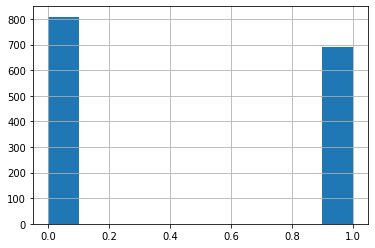

In [12]:
classes = df['Class'].astype(int)
classes.hist(bins=10)

In [13]:
df_nan_count = df['F15'].isna().sum()
print("NaN count in Train F15: ", df_nan_count)

df_nan_count = df_test['F15'].isna().sum()
print("NaN count in Test F15: ", df_nan_count)

NaN count in Train F15:  750
NaN count in Test F15:  750


In [14]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(n_neighbors = 3).fit_transform(df), columns = df.columns)
X_holdout = pd.DataFrame(KNN(n_neighbors = 3).fit_transform(df_test), columns = df_test.drop('Class', axis = 1).columns)

In [15]:
print("count of NULL values after imputation: ", df['F15'].isnull().sum())

count of NULL values after imputation:  0


In [16]:
smote_oversample = SMOTE()
y = df['Class']
y_test = df_test['Class']
X = df.drop('Class', axis = 1)
#X_holdout = df_test.drop('Class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print('Before oversampling: ', Counter(y_train))
X_train, y_train = smote_oversample.fit_resample(X_train, y_train)
print('Afer oversampling: ', Counter(y_train))
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)
X_holdout = scaler_x.transform(X_holdout)

Before oversampling:  Counter({0.0: 607, 1.0: 518})
Afer oversampling:  Counter({1.0: 607, 0.0: 607})


In [17]:
#dtc = RandomForestClassifier(criterion = 'gini', random_state=0)
#params = {'n_estimators':[100, 200], 'max_depth':[None,3,6,9,12], 'min_samples_split':[10,15,25,50], 'min_samples_leaf':[10,15,25,50]}
#clf = GridSearchCV(dtc, params)
#clf.fit(X_train, y_train)
#clf.cv_results_['params']

In [18]:
#clf.cv_results_['mean_test_score']
#0.87454038

In [19]:
#clf.cv_results_['std_test_score']

In [20]:
#clf.cv_results_['params'][49]

In [21]:
results = []
names = []
testing = []

**DECISION TREE**

In [22]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=3, random_state = 0)

cv_results = cross_validate(dtc, X_train, y_train, scoring='f1', cv=10)
results.append(cv_results['test_score'])
names.append('DT')

In [23]:
dtc.fit(X_train, y_train)
dtc_res = dtc.predict(X_test)
dtc_testing = f1_score(dtc_res, y_test)
testing.append(dtc_testing)

**LOGISTIC REGRESSION** 

In [24]:
lrc = LogisticRegression(penalty = 'none', max_iter = 1000, random_state = 0)

cv_results = cross_validate(lrc, X_train, y_train, scoring='f1', cv=10)
results.append(cv_results['test_score'])
names.append('LR')

In [25]:
lrc.fit(X_train, y_train)
lrc_res = lrc.predict(X_test)
lrc_testing = f1_score(lrc_res, y_test)
testing.append(lrc_testing)

**RANDOM FOREST CLASSIFIER**


In [26]:
rfc = RandomForestClassifier(max_depth = 10, n_estimators = 200, criterion = 'gini', min_samples_split = 10, min_samples_leaf = 3, random_state = 0)

cv_results = cross_validate(rfc, X_train, y_train, scoring='f1', cv=10)
results.append(cv_results['test_score'])
names.append('RF')

In [27]:
rfc.fit(X_train, y_train)
rfc_res = rfc.predict(X_test)
rfc_testing = f1_score(rfc_res, y_test)
testing.append(rfc_testing)

**GRADIENT BOOSTING CLASSIFIER**

In [28]:
gbc = GradientBoostingClassifier(max_depth = 10, subsample=0.30, n_estimators = 200, criterion = 'friedman_mse', min_samples_split = 25, min_samples_leaf = 3, random_state = 0)

cv_results = cross_validate(gbc, X_train, y_train, scoring='f1', cv=10)
results.append(cv_results['test_score'])
names.append('GB')

In [29]:
gbc.fit(X_train, y_train)
gbc_res = gbc.predict(X_test)
gbc_testing = f1_score(gbc_res, y_test)
testing.append(gbc_testing)

**ADABOOST CLASSIFIER**

In [30]:
adb = AdaBoostClassifier(n_estimators=100, algorithm='SAMME.R', base_estimator = GradientBoostingClassifier(n_estimators = 500, subsample = 0.6, random_state = 0), random_state=0)

cv_results = cross_validate(adb, X_train, y_train, scoring='f1', cv=10)
results.append(cv_results['test_score'])
names.append('ADB')

In [31]:
adb.fit(X_train, y_train)
adb_res = adb.predict(X_test)
adb_testing = f1_score(adb_res, y_test)
testing.append(adb_testing)

**MULTILAYER PERCEPTRON**

In [32]:
mlp = MLPClassifier(max_iter = 5000, hidden_layer_sizes=(60,120,120,60,30), solver='lbfgs', alpha=0.75, random_state=0)

cv_results = cross_validate(mlp, X_train, y_train, scoring='f1', cv=10)
results.append(cv_results['test_score'])
names.append('MLP')

In [33]:
mlp.fit(X_train, y_train)
mlp_res = mlp.predict(X_test)
mlp_testing = f1_score(mlp_res, y_test)
testing.append(mlp_testing)

# **Model Comparison**

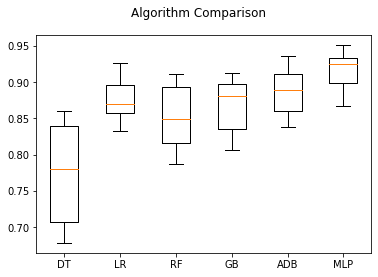

In [34]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

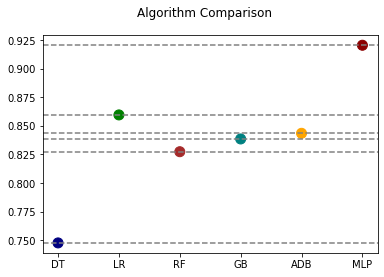

In [35]:
fig2 = plt.figure()
colors = ['navy', 'green', 'brown', 'teal', 'orange', 'darkred']
fig2.suptitle('Algorithm Comparison')
bx = fig2.add_subplot(111)
[plt.axhline(y=i, linestyle='--', color = 'gray') for i in testing]
plt.scatter(names, testing, s=100, c=colors)
plt.show()

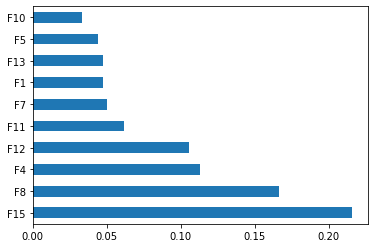

In [36]:
feat_importances = pd.Series(adb.feature_importances_, index=df.columns.drop('Class'))
feat_importances.nlargest(10).plot(kind='barh')

In [40]:
for result in results:
  print(result.mean())
  print(result.std())

print('final')

for result in testing:
  print(result)

0.7739065386507218
0.06838511198783692
0.8765867171734207
0.028664732137118145
0.852314490081396
0.04433016225816322
0.8688091478983269
0.03628601886322121
0.8873103275041085
0.03501969188181281
0.9169301015803283
0.0246817216058812
final
0.7477203647416415
0.8595041322314049
0.8273809523809523
0.8385093167701863
0.8434504792332267
0.920353982300885


# **Predictions on Holdout Set**

In [37]:
predictions = mlp.predict(X_holdout)
df_test['Class'] = predictions.astype(int)
df_test['Class']

0       0
1       1
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    1
Name: Class, Length: 1500, dtype: int64

In [38]:
df_test.to_csv("CE802_P2_Test.csv", index = False)